In [30]:
from warnings import filterwarnings

filterwarnings("ignore")
from datetime import datetime
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from modules.data_fetcher import download_historical_data


In [21]:
symbols = set(
    [
        "DOGE3L-USDT",
        "DOGE3S-USDT",
        "BNB-USDT",
        "AVAX3L-USDT",
        "AVAX3S-USDT",
        "BTC-USDT",
        "EQZ-USDT",
        "SOLVE-BTC",
        "ETH-USDT",
        "KDA-USDT",
        "SOL-USDT",
        "EGLD-USDT",
        "ALGO-USDT",
        "NKN-USDT",
        "LOOM-BTC",
        "GEM-USDT",
        "CUSD-USDT",
        "LTC3L-USDT",
    ]
)


def build_close_symbols_df(symbols: set) -> pd.DataFrame:
    df = pd.DataFrame()
    for symbol in symbols:
        print(symbol)
        df_BTC = download_historical_data(symbol, "1day")
        df_BTC.index = df_BTC.index.map(lambda x: datetime(x.year, x.month, x.day))
        df = pd.concat(
            [df, df_BTC[[f"Close"]].rename(columns={"Close": f"{symbol}_Close"})],
            axis=1,
        )
    return df


closes = build_close_symbols_df(symbols)
closes.head()


DOGE3S-USDT
NKN-USDT
AVAX3L-USDT
GEM-USDT
DOGE3L-USDT
SOLVE-BTC
ETH-USDT
BNB-USDT
ALGO-USDT
AVAX3S-USDT
BTC-USDT
EQZ-USDT
SOL-USDT
EGLD-USDT
LTC3L-USDT
CUSD-USDT
KDA-USDT
LOOM-BTC


,DOGE3S-USDT_Close,NKN-USDT_Close,AVAX3L-USDT_Close,GEM-USDT_Close,DOGE3L-USDT_Close,SOLVE-BTC_Close,ETH-USDT_Close,BNB-USDT_Close,ALGO-USDT_Close,AVAX3S-USDT_Close,BTC-USDT_Close,EQZ-USDT_Close,SOL-USDT_Close,EGLD-USDT_Close,LTC3L-USDT_Close,CUSD-USDT_Close,KDA-USDT_Close,LOOM-BTC_Close
Date,,,,,,,,,,,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,762.000005,NaN,NaN,NaN,13586.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,801.100000,NaN,NaN,NaN,14100.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,NaN,NaN,NaN,NaN,NaN,NaN,956.000000,NaN,NaN,NaN,15380.011104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,947.000010,NaN,NaN,NaN,15194.999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,NaN,NaN,NaN,NaN,NaN,NaN,963.030989,NaN,NaN,NaN,17266.663939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
returns = closes.pct_change().dropna()
log_returns = np.log(returns)
returns

,DOGE3S-USDT_Close,NKN-USDT_Close,AVAX3L-USDT_Close,GEM-USDT_Close,DOGE3L-USDT_Close,SOLVE-BTC_Close,ETH-USDT_Close,BNB-USDT_Close,ALGO-USDT_Close,AVAX3S-USDT_Close,BTC-USDT_Close,EQZ-USDT_Close,SOL-USDT_Close,EGLD-USDT_Close,LTC3L-USDT_Close,CUSD-USDT_Close,KDA-USDT_Close,LOOM-BTC_Close
Date,,,,,,,,,,,,,,,,,,
2022-10-12,0.020381,0.004585,0.000000,-0.418011,-0.016590,-0.012274,0.010864,-0.002133,-0.013841,-0.016469,0.004958,0.111111,0.011364,0.012409,-0.003536,-0.000101,0.004195,-0.024809
2022-10-13,0.008104,-0.027820,-0.048780,-0.138147,-0.014058,-0.030178,-0.005610,0.002706,0.018820,0.055340,0.011475,0.017857,-0.021124,-0.040555,-0.083038,0.002211,-0.018499,-0.033659
2022-10-14,0.042956,-0.015268,0.006410,-0.132950,-0.049430,0.054912,0.007257,-0.007577,-0.006575,-0.008901,-0.010245,0.792982,-0.016300,0.001691,0.008514,-0.001204,-0.036480,-0.007695
2022-10-15,0.005294,0.009940,-0.057325,-0.098389,0.003000,-0.002313,-0.016624,-0.005168,0.005043,0.050957,-0.005674,-0.154599,-0.013103,0.055889,-0.082118,-0.000201,0.010491,0.008163
2022-10-16,-0.015025,0.042840,0.077703,0.240769,0.009970,-0.012174,0.024201,0.015957,0.010662,-0.069478,0.010174,0.208333,0.018817,-0.008881,0.073579,-0.000402,0.047615,-0.004049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-08,0.038087,0.061917,-0.025614,-0.040000,-0.034375,0.058648,-0.008022,0.000638,-0.013242,0.027119,0.001190,0.064637,-0.020005,-0.009816,-0.026735,-0.000301,-0.009128,0.018389
2023-04-09,-0.070069,0.092360,0.013363,-0.013889,0.058252,-0.014085,0.005295,0.006988,0.001851,-0.016502,0.013658,-0.039665,0.012478,-0.010409,0.026300,0.000401,0.016044,-0.019776
2023-04-10,-0.051765,0.027064,0.059230,-0.025352,0.055046,-0.002857,0.027677,0.018752,0.021247,-0.053691,0.046461,-0.034560,0.030021,0.022039,0.105353,0.000301,0.013651,-0.026754


In [23]:
num_ports = 20000
all_weights = np.zeros((num_ports, len(returns.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(len(returns.columns)))
    weights = weights / np.sum(weights)

    # Save weights
    all_weights[x, :] = weights

    # Expected return
    ret_arr[x] = np.sum((returns.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x] / vol_arr[x]


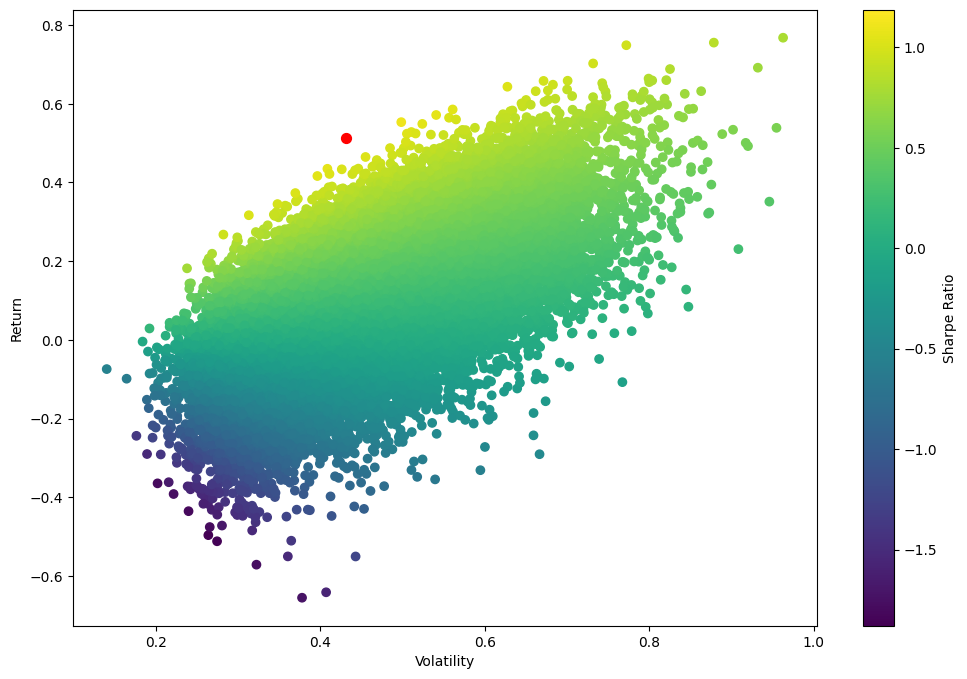

In [24]:
plt.figure(figsize=(12, 8))

plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap="viridis")
plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.scatter(
    vol_arr[sharpe_arr.argmax()], ret_arr[sharpe_arr.argmax()], c="red", s=50
)  # red dot
plt.show()


In [27]:
{p: w for p, w in zip(closes.columns, all_weights[sharpe_arr.argmax(), :])}


{'DOGE3S-USDT_Close': 0.00820443131552766,
 'NKN-USDT_Close': 0.10292983498164822,
 'AVAX3L-USDT_Close': 0.04056104526658029,
 'GEM-USDT_Close': 0.003127363461341563,
 'DOGE3L-USDT_Close': 0.07717335355431129,
 'SOLVE-BTC_Close': 0.02010196721918437,
 'ETH-USDT_Close': 0.04534347156690356,
 'BNB-USDT_Close': 0.03431293923056125,
 'ALGO-USDT_Close': 0.026329501545065567,
 'AVAX3S-USDT_Close': 0.12554047433703083,
 'BTC-USDT_Close': 0.08849908108478176,
 'EQZ-USDT_Close': 0.0927212903360653,
 'SOL-USDT_Close': 0.006384296190967674,
 'EGLD-USDT_Close': 0.012670706256180267,
 'LTC3L-USDT_Close': 0.08709081162899276,
 'CUSD-USDT_Close': 0.09651189427200113,
 'KDA-USDT_Close': 0.028963188968185227,
 'LOOM-BTC_Close': 0.10353434878467113}

# Other Optimization process


In [52]:
def get_ret_vol_sr(weights):  # Cost function
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights) * 365
    vol = np.sqrt(weights.T @ returns.cov() * 365 @ weights)
    sr = ret / vol
    return np.array([ret, vol, sr])


def neg_sharpe(weights):
    return -get_ret_vol_sr(weights)[1]


def check_sum(weights):
    # return 0 if sum of the weights is 1
    return np.sum(weights) - 1


cons = {"type": "eq", "fun": check_sum}
bounds = tuple([(0, 1) for _ in range(len(returns.columns))])
init_guess = [1 / len(returns.columns) for _ in range(len(returns.columns))]

In [53]:
opt_results = minimize(
    neg_sharpe, init_guess, method="SLSQP", bounds=bounds, constraints=cons
)
opt_results

     fun: -3.4934103207601397
     jac: array([ 3.01011658, -0.35968822, -1.39979348, -0.36892754, -3.49341032,
        0.03706431, -0.43903244, -0.31827796, -0.51195723,  1.41489124,
       -0.29720825, -0.32060248, -0.63086244, -0.29668933, -1.08147562,
       -0.01051024, -0.43948856, -0.09908986])
 message: 'Optimization terminated successfully'
    nfev: 76
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([1.80718983e-13, 8.13568340e-14, 0.00000000e+00, 9.45900585e-14,
       1.00000000e+00, 6.23737123e-14, 4.50122842e-14, 4.36441357e-14,
       5.37820802e-14, 9.68904514e-14, 4.70566575e-14, 8.63458670e-14,
       5.35242322e-14, 5.01799976e-14, 5.42302526e-14, 4.70790484e-14,
       4.59146782e-14, 6.32644531e-14])

In [54]:
print(
    f"Return: {get_ret_vol_sr(opt_results.x)[0]:.2f}\nVolatility: {get_ret_vol_sr(opt_results.x)[1]:.2f}\nSharpe-ratio: {get_ret_vol_sr(opt_results.x)[2]:.2f}"
)

{p: w for p, w in zip(closes.columns, opt_results.x)}



Return: 2.81
Volatility: 3.49
Sharpe-ratio: 0.80


{'DOGE3S-USDT_Close': 1.8071898300076914e-13,
 'NKN-USDT_Close': 8.135683397537226e-14,
 'AVAX3L-USDT_Close': 0.0,
 'GEM-USDT_Close': 9.459005854916824e-14,
 'DOGE3L-USDT_Close': 0.9999999999993829,
 'SOLVE-BTC_Close': 6.237371231724576e-14,
 'ETH-USDT_Close': 4.501228417637329e-14,
 'BNB-USDT_Close': 4.364413572162004e-14,
 'ALGO-USDT_Close': 5.378208023806613e-14,
 'AVAX3S-USDT_Close': 9.689045143010502e-14,
 'BTC-USDT_Close': 4.7056657490918005e-14,
 'EQZ-USDT_Close': 8.634586700641264e-14,
 'SOL-USDT_Close': 5.352423218197141e-14,
 'EGLD-USDT_Close': 5.0179997613501784e-14,
 'LTC3L-USDT_Close': 5.423025257402783e-14,
 'CUSD-USDT_Close': 4.707904836671289e-14,
 'KDA-USDT_Close': 4.591467823671626e-14,
 'LOOM-BTC_Close': 6.326445314329034e-14}

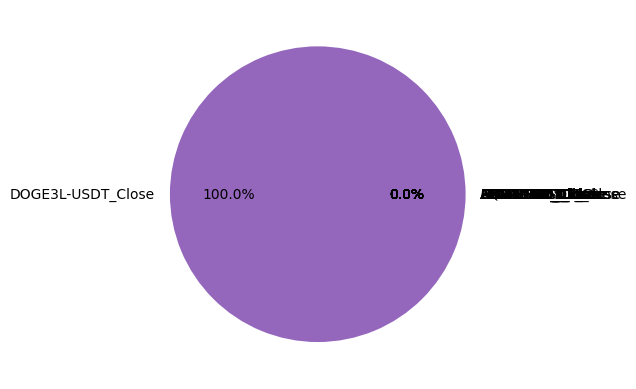

In [55]:
plt.pie(opt_results.x, labels=list(closes.columns), autopct="%1.1f%%")
plt.show()